# Construction of double-sorted risk factor

This codes construct a double-sorted long-short portfolio on Small/Big and Green/Brown stocks. Data includes all stocks from major EU countries from 2017:M1 to 2024:M8. Stocks are identified by the International Securities Identification Number (ISIN).

## Data preparation and factor construction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv("../Data/Data_for_3F.csv", index_col=0)

print(data.head())

         date          isin   Returns    Mkt. Cap.     EScore
0  2017-01-03  BE0003470755  0.134168  3347.546522  83.541034
1  2017-01-04  BE0003470755 -0.535954  3309.485548  83.541034
2  2017-01-05  BE0003470755 -0.404131  3320.062332  83.541034
3  2017-01-09  BE0003470755 -0.407056  3227.084078  83.541034
4  2017-01-10  BE0003470755 -0.681199  3312.894307  83.541034


## Construct Size factor

At each date $t$ we divide the stocks into five bins for each characteristic (Environmental Score and Size). The double-sorted long-short portfolio is defined as:
$$
\text{SmB} = R_{Green} - R_{Brown}
$$

where:
- $R_{Small}$: return of green stocks
- $R_{Big}$: return of brown stocks



In [ ]:
dates = data['date'].unique()

rB = []
rG = []
for t in dates:
    data_t = data[data['date'] == t].copy()
    data_t.loc[:, 'qESG']  = pd.qcut(data_t['EScore'], q=5, labels=list(range(1, 6)), retbins=True)[0]

    Brown = data_t[data_t['qESG'] == 1]
    wBrown = np.array(Brown['Mkt. Cap.'] / Brown['Mkt. Cap.'].sum())
    rBrown = np.array(Brown['Returns'])

    rB.append(wBrown.T @ rBrown)

    Green = data_t[data_t['qESG'] == 5]
    wGreen = np.array(Green['Mkt. Cap.'] / Green['Mkt. Cap.'].sum())
    rGreen = np.array(Green['Returns'])

    rG.append(wGreen.T @ rGreen)



SizeFactor = pd.DataFrame(index=dates, columns=['Green', 'Brown'])

SizeFactor['Green'] = rG
SizeFactor['Brown'] = rB
SizeFactor['GmB'] = SizeFactor['Green'] - SizeFactor['Brown']


## Construct factor

In [4]:

SizeFactor = pd.DataFrame(index=dates, columns=['Green', 'Brown'])

SizeFactor['Green'] = rG
SizeFactor['Brown'] = rB
SizeFactor['GmB'] = SizeFactor['Green'] - SizeFactor['Brown']


## Plot cumulative returns

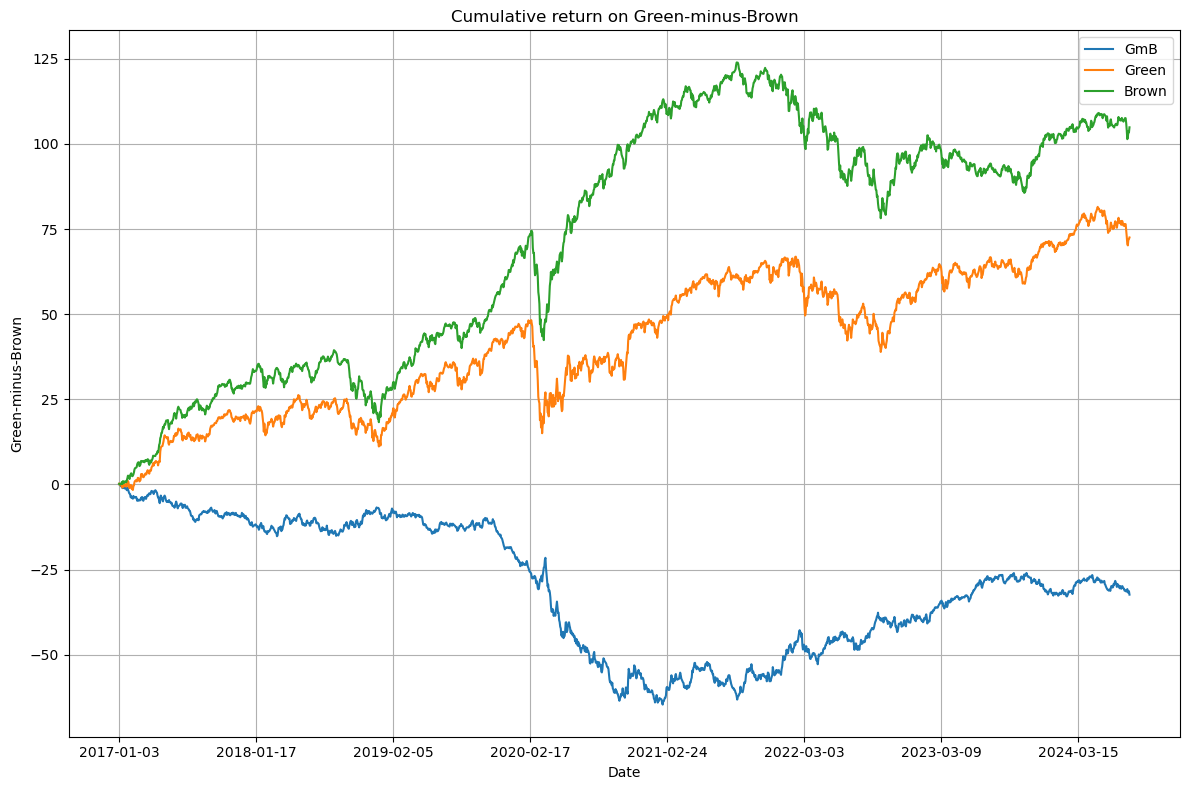

In [8]:

fig = plt.figure(figsize=(12, 8))
plt.plot(SizeFactor['GmB'].cumsum(), label='GmB')
plt.plot(SizeFactor['Green'].cumsum(), label='Green')
plt.plot(SizeFactor['Brown'].cumsum(), label='Brown')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Green-minus-Brown")
plt.title("Cumulative return on Green-minus-Brown")
plt.legend()
plt.tight_layout()

plt.show()
